In [180]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
from collections import Counter
%matplotlib inline
plt.style.use('bmh')
sns.set()

In [16]:
df = pd.read_csv('/Users/seba/Documents/Badi/user_onboarding - Sheet1.csv', 
                 parse_dates=['user_created_at','first_search_time','birth_date'])

In [17]:
df.head()

,signup_platform,user_created_at,metro,birth_date,first_search_time
0,android,2019-01-13 12:47:18,Madrid,1998-04-06,2019-07-10 10:16:32
1,ios,2019-01-18 17:42:35,Madrid,1989-01-14,NaT
2,android,2019-01-18 14:00:39,Madrid,1989-02-07,2019-01-18 14:47:50
3,web,2019-01-18 00:38:00,Madrid,1979-05-07,2019-01-18 00:44:09
4,android,2019-01-18 14:12:56,Madrid,1997-01-15,2019-01-18 14:14:14


In [18]:
df.dtypes

signup_platform              object
user_created_at      datetime64[ns]
metro                        object
birth_date           datetime64[ns]
first_search_time    datetime64[ns]
dtype: object

In [19]:
df.isna().sum()

signup_platform       0
user_created_at       0
metro                 0
birth_date            0
first_search_time    74
dtype: int64

## 1. Validate or reject the following statements:


● Madrid is the most common city in the DataSet


● Most iOS signed up users are from Barcelona

● Most used platform in all metros is iOS

### Madrid is the most common city in the DataSet is True

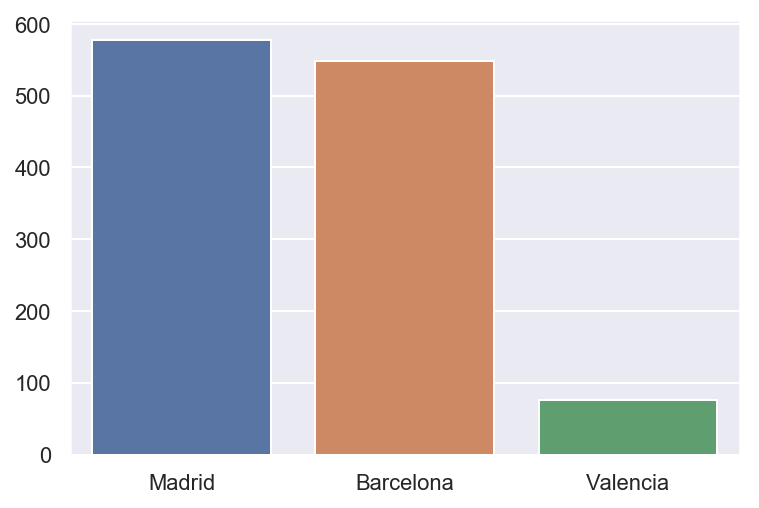

In [48]:
sns.barplot(x=df.metro.value_counts().index, y=df.metro.value_counts().values)

### Most iOS signed up users are from Barcelona is True

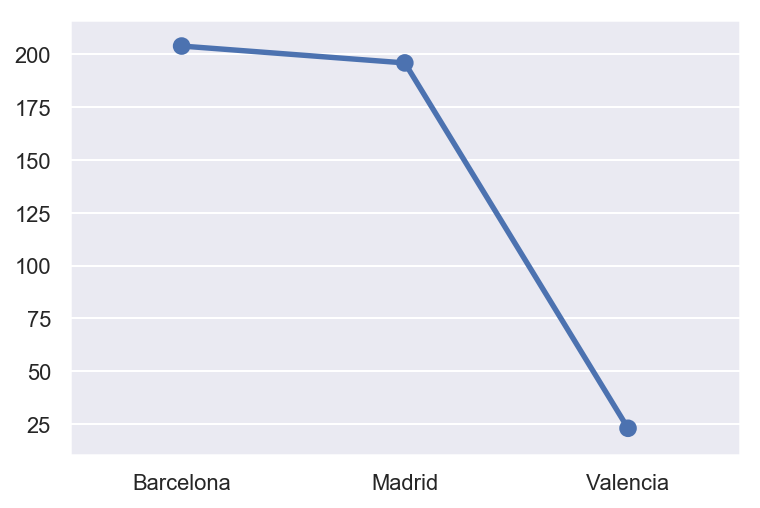

In [51]:
sns.pointplot(x=df[df.signup_platform == 'ios'].metro.value_counts().index, 
              y=df[df.signup_platform == 'ios'].metro.value_counts().values)


### Most used platform in all metros is iOS is False
<br>
The most used platform is Android

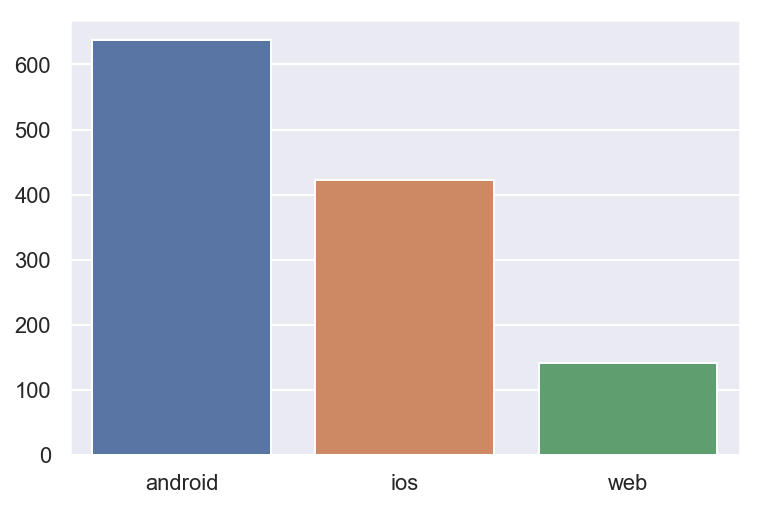

In [53]:
sns.barplot(x=df.signup_platform.value_counts().index,
            y=df.signup_platform.value_counts().values)

2. One important metric in badi is the rate from signup to search. That means
that out of all users that signup how many achieve to make at least 1 search.


● What’s the value of this rate for the whole dataset?

● Which % of users did a search within the first 5 minutes after the
signup?

● There are two different projects in badi, one expects to make a 10%
improvement on an iOS device, the other expects a 20% improvement
for web. Which one shall we do?

### What’s the value of this rate for the whole dataset?

In [56]:
df.first_search_time.isna().sum()/len(df)*100

6.1615320566194836

6.16% don't search

In [57]:
df.dropna(inplace=True)

In [77]:
def after_signup_X_min(row, mins=5):
    seconds = mins * 60
    time_between_first_search = row.first_search_time - row.user_created_at
    return time_between_first_search.total_seconds() < seconds

In [82]:
df['within_5_min_signup'] = df.apply(lambda row: after_signup_X_min(row, 5), axis=1)

In [83]:
df['within_5_min_signup'].sum()/len(df)*100

42.857142857142854

### Which % of users did a search within the first 5 minutes after the signup?

43% of Users in this data set, did a search within the first 5 minutes after the signup

### There are two different projects in badi, one expects to make a 10% improvement on an iOS device, the other expects a 20% improvement for web. Which one shall we do?

In [89]:
df[df.signup_platform == 'ios'].within_5_min_signup.value_counts(normalize=True)*100

False    55.388471
True     44.611529
Name: within_5_min_signup, dtype: float64

In [90]:
df[df.signup_platform == 'web'].within_5_min_signup.value_counts(normalize=True)*100

False    52.03252
True     47.96748
Name: within_5_min_signup, dtype: float64

In [94]:
df[df.signup_platform == 'ios'].within_5_min_signup.value_counts()

False    221
True     178
Name: within_5_min_signup, dtype: int64

In [96]:
df[df.signup_platform == 'web'].within_5_min_signup.value_counts()

False    64
True     59
Name: within_5_min_signup, dtype: int64

In [102]:
84/123

0.6829268292682927

In [101]:
196/399

0.49122807017543857

3. Calculate for every user with a search on the dataSet their age at search time;
and also their birthday. Answer the following questions:

● What is the Average age and Median age of all users?

● Why are Average and Median different? Can you take any conclusions
about this difference?

● Can you plot the distribution of the age per each city? Explain it.

● What is the most common birthday? Explain why

In [131]:
def calculate_age(row):
    age_in_seconds = row.first_search_time - row.birth_date
    return int(age_in_seconds.total_seconds() / (365*86400))

In [132]:
df['years_at_search_time'] = df.apply(lambda row: calculate_age(row), axis=1)

### What is the Average age and Median age of all users?

In [138]:
print('The average age is: {}'.format(df.years_at_search_time.mean()))

The average age is: 28.5226264418811


In [139]:
print('The median age is: {}'.format(df.years_at_search_time.median()))

The median age is: 27.0


In [150]:
print('The min age is: {}'.format(df.years_at_search_time.min()))
print('The max age is: {}'.format(df.years_at_search_time.max()))

The min age is: 17
The max age is: 118


### Why are Average and Median different? Can you take any conclusions about this difference?

The average and median are different calculations, that is why their are different.
<br>
The difference between these values it is small, since the average is 1.5 years greater. About this difference since the median is from all the ages in the data set sorted, the age at the middle of all values. From 1127 users, more than half have 27 years old or less.
<br>
And looking what are the min and max age, make sense the mean is greater than the median, since the min value is close to the median. And the max value (which is an outlier), is much wider. So if there is a lot of larger values, this will increase the average.
<br>
In the above graph easy to appreciate this small difference

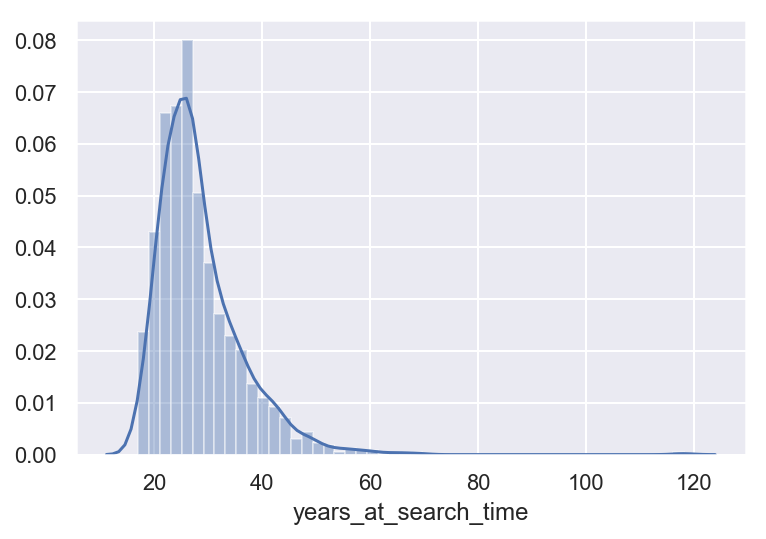

In [153]:
sns.distplot(df.years_at_search_time)

### Can you plot the distribution of the age per each city? Explain it.

First I remove the user with 118 years, this is an outlier to this dataset

In [162]:
df = df[df.years_at_search_time < 118]

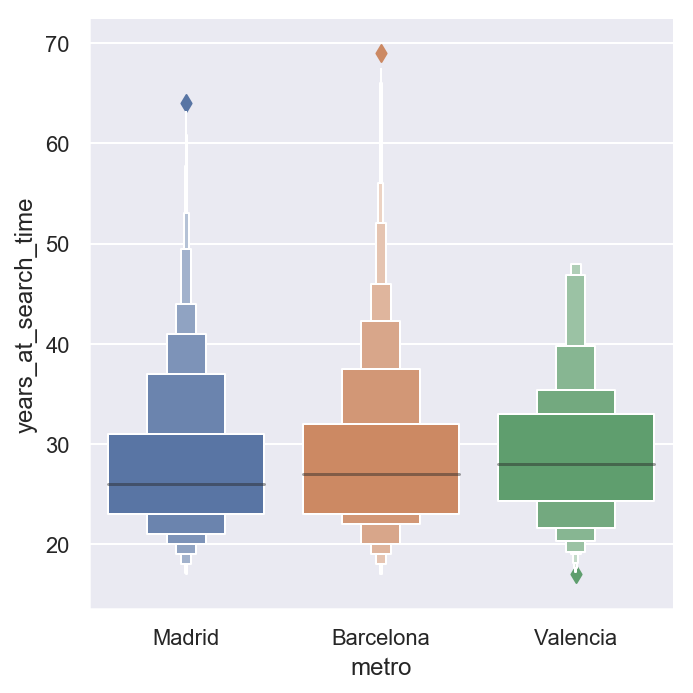

In [165]:
ax = sns.catplot(x="metro", y="years_at_search_time", kind="boxen", data=df);

So the three cities are mostly distributed similarly which make sense. The median is different for all cities, but close enough.
<br>
Most of the people are between 23 and 32, but in Madrid this range is younger than in Valencia. While in Barcelona it is wider range.
<br>
Then the oldest person looking for a place are in Madrid and Barcelona, given that in Valencia are less than 100 searches, the are no person over 50 searching place in the plattform.
<br>
There are not lot's of young people looking for a place, and betwwen 32-38 there is a big group in Barcelona and Madrid. 

### What is the most common birthday? Explain why

In [177]:
birthdays = []
for _, value in df.birth_date.items():
    birthdays.append('{}/{}'.format(value.day,value.month))


In [184]:
Counter(birthdays).most_common(3)

[('1/1', 16), ('19/2', 12), ('23/2', 10)]

In [187]:
df[(df.birth_date.dt.day ==1) & (df.birth_date.dt.month == 1)]

,signup_platform,user_created_at,metro,birth_date,first_search_time,before_5_min,after_signup,within_5_min_signup,years_at_search_time
36,android,2019-01-18 22:46:51,Barcelona,1989-01-01,2019-03-24 10:50:32,False,False,False,30
48,ios,2019-01-26 12:28:43,Valencia,1991-01-01,2019-01-26 12:33:50,False,False,False,28
58,ios,2019-01-26 15:39:15,Madrid,1992-01-01,2019-01-26 15:48:04,False,False,False,27
163,web,2019-01-13 10:45:40,Barcelona,1950-01-01,2019-01-13 10:46:11,True,True,True,69
188,ios,2019-01-24 14:03:38,Barcelona,1993-01-01,2019-01-24 14:06:26,True,True,True,26
347,web,2019-01-17 11:24:33,Barcelona,1983-01-01,2019-01-17 11:45:57,False,False,False,36
562,web,2019-02-03 09:55:39,Barcelona,1983-01-01,2019-02-03 10:00:24,True,True,True,36
728,web,2019-02-06 22:49:57,Madrid,1995-01-01,2019-02-06 22:50:35,True,True,True,24
744,ios,2019-02-06 20:27:28,Barcelona,1993-01-01,2019-02-06 20:27:38,True,True,True,26
771,ios,2019-02-06 22:36:42,Barcelona,1992-01-01,2019-02-06 22:36:52,True,True,True,27


So most common birthday is January 1st, and there is nothing strange on this people data.
<br>
My assumption is that only the year of birth it is needed by the time of registration. That is why it is the date that most appear, for users that registered only user birth year, and day and month are filled automatically on January 1st

# The tents feature

1. We don't have neighbourhoods in our database and we would like to have
some group of rooms that are close. How can you do this? Show the results.
Which of these groups has a higher density of gardens and to which one
matches with London?

In [567]:
# For this kind of problem a DBSCAN algorithms performs well enough to do a clustering, since to cluster locations, 
#haversine metric for distance is needed for better results
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [568]:
tents = pd.read_csv('/Users/seba/Documents/Badi/latitude_longitude_gardens - Sheet2.csv')

In [569]:
tents.head()

,latitude,longitude,has_garden
0,51.508302,-0.130575,1
1,51.469212,-0.199346,0
2,51.466144,-0.171237,1
3,51.529175,-0.024431,0
4,51.514440,-0.175268,0


In [570]:
tents.duplicated().sum()

803

There are 803 rows duplicated, so I'm removing them

In [571]:
tents = tents[~tents.duplicated()]

In [572]:
tents.duplicated(subset=['latitude','longitude'], keep=False).sum()

230

In [573]:
tents[tents.duplicated(subset=['latitude','longitude'], keep=False)].head()

,latitude,longitude,has_garden
2,51.466144,-0.171237,1
7,51.525251,0.026408,0
10,51.516896,-0.056530,1
18,51.529688,-0.059902,0
20,51.508293,-0.003774,0


There are also other duplicates rows on latitude and longitude, but they have different has_garden column.
<br>
For the excercise, I'm going to leave both column, because deciding which one will affect the final results.
<br>
Below there is an example of 2 rows with same latitude and longitude, but one has_garden and the other does not

In [574]:
tents[tents.longitude == -0.171237]

,latitude,longitude,has_garden
2,51.466144,-0.171237,1
3044,51.466144,-0.171237,0


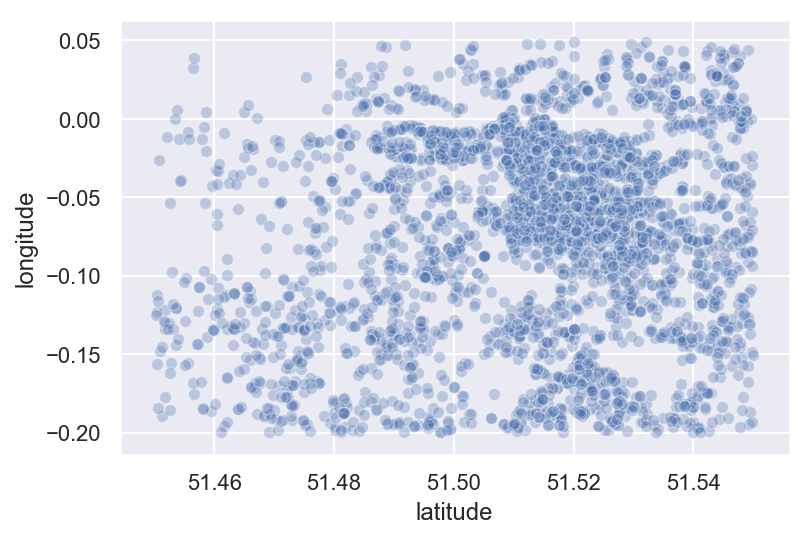

In [575]:
sns.scatterplot(x='latitude', y='longitude', data=tents, alpha=0.3)

By decreasing the Alpha, it is easy to appreciate which are the dense areas

In [576]:
coords = tents.as_matrix(columns=['latitude', 'longitude'])

#DBSCAN use distance in Radians
kms_per_radian = 6371.0088
#I selected 0.35km of distance to cluster, and also min_samples of 3 to conform a group
epsilon = 0.35 / kms_per_radian
db = DBSCAN(eps=epsilon, min_samples=3, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))
clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))



/Users/seba/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


Number of clusters: 65


In [577]:
Counter(cluster_labels).most_common()[:20]

[(0, 2757),
 (2, 162),
 (3, 147),
 (-1, 94),
 (20, 38),
 (8, 37),
 (13, 35),
 (28, 33),
 (1, 32),
 (21, 32),
 (18, 30),
 (10, 20),
 (23, 18),
 (30, 18),
 (53, 17),
 (7, 16),
 (43, 16),
 (9, 15),
 (11, 15),
 (26, 15)]

In [578]:
tents['cluster'] = cluster_labels

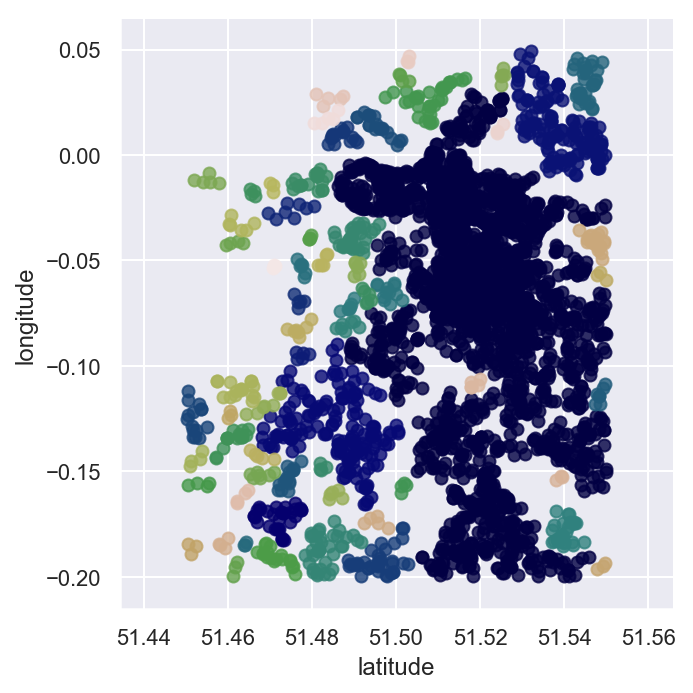

In [593]:
facet = sns.lmplot(data=tents[tents.cluster >= 0], x='latitude', y='longitude', hue='cluster',
                   palette=sns.color_palette("gist_earth", n_colors=num_clusters),
                   fit_reg=False, legend=False, legend_out=True)

In the above graph is how clusters are distributed over the different clusters. For a distane a 350m and a min_samples there are 65 clusters

In [592]:
Counter(tents[tents.has_garden == 1].cluster).most_common(3)

[(0, 524), (3, 48), (-1, 30)]

The zone with more gardens is Zone 0

### Which email version shall we send?

In [601]:
emails_version = {'user_who_received_email':  [457,462,438],
        'user_who_visited': [156,128,213],
        'users_who_listed': [19,32,10]
        }

emails = pd.DataFrame(emails_version, index=['A','B','C'])

In [602]:
emails

,user_who_received_email,user_who_visited,users_who_listed
A,457,156,19
B,462,128,32
C,438,213,10


In [612]:
emails['conversion_rate'] = (emails.users_who_listed / a.user_who_visited) * (a.user_who_visited / a.user_who_received_email) * 100

In [613]:
emails

,user_who_received_email,user_who_visited,users_who_listed,conversion_rate
A,457,156,19,4.157549
B,462,128,32,7.002188
C,438,213,10,2.188184


By doing a conversion rate on the final number from how many user received email to the actual number of users who listed as tent, the best email to send it is email __B__ that it has a 7% of conversion rate.
